# ¡Hola Bastian!

Mi nombre es Ezequiel Ferrario, soy code reviewer en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.
</div>

¡Empecemos!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda que lo que esta entre corchete es una mera guia para el alumno. Este al ser un proyecto simulando un espacio profesional, deberias eliminar los mismos.

Esta correccion aplica a cualquier parte donde se encuentre este tipo de guias ya que es un requisito de **forma** obligatorio para aprobar el proyecto (es decir, que no quede ninguna guia/corchete).</div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a>

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, levene
from datetime import datetime
import seaborn as sns

## Cargar datos

In [2]:
users_df = pd.read_csv('/datasets/megaline_users.csv')
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')# Carga los archivos de datos en diferentes DataFrames

## Preparar los datos

## Tarifas

In [3]:
print(plans_df.info())
# Imprime la información general/resumida sobre el DataFrame de las tarifas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
plans_df.head()
# Imprime una muestra de los datos para las tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


* Basado en la información proporcionada, los datos en plans_df están bien estructurados para el análisis. Sin embargo, sería prudente convertir las columnas usd_monthly_pay y usd_per_gb a tipo float. Esto se debe a que el dólar estadounidense (USD) opera con valores fraccionarios y ajustar estos campos a float permitiría una representación más precisa de los costos. Además, dado el amplio rango de uso entre los usuarios, permitir decimales en estos campos ofrece una mayor flexibilidad y precisión para futuros análisis y variaciones en los datos.

## Corregir datos

In [5]:
plans_df['usd_monthly_pay'] = plans_df['usd_monthly_pay'].astype(float)
plans_df['usd_per_gb'] = plans_df['usd_per_gb'].astype(float)
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Enriquecer los datos

In [6]:
# Convertir los valores de mb_per_month_included a GB
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

# Visualizar el DataFrame con la conversión realizada
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

En este caso nuestro cliente trabaja con GB, pasa los mb a GB y recorda la conversion (1024).</div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>

## Usuarios/as

In [7]:
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
users_df.head()
# Imprime una muestra de datos para usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [9]:
users_df.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe() para una exploracion rapida inicial de aquellas variables numericas. Siempre es necesario realizarlo ya que de forma rapida tenemos un panorama muy bueno de que nos espera e incluso encontraremos inconsistencias si existiencen.
Describi al respecto lo que ves. </div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a></div>    
    
<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>    

* Basado en la información proporcionada, los datos en users_df están bien estructurados para el análisis. No obstante, sería aconsejable convertir las columnas reg_date y churn_date a tipo datetime. Esto se debe a que el manejo de fechas y tiempos en análisis de datos se optimiza cuando se utilizan formatos adecuados que permiten operaciones temporales precisas. Ajustar estos campos a datetime mejoraría significativamente la capacidad de realizar análisis temporales, como calcular la duración de las suscripciones o identificar patrones de baja. Además, la presencia de valores nulos en churn_date refleja usuarios activos, lo cual es un aspecto importante para cualquier análisis relacionado con la retención de clientes o la duración promedio de las suscripciones. Mantener estos valores como nulos, o manejarlos de manera adecuada, ofrece una representación precisa del estado actual de los usuarios, facilitando así una evaluación más precisa de la base de clientes activos versus inactivos.

### Corregir los datos

In [10]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')  # Permite manejar strings inválidos si los hay

users_df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


### Enriquecer los datos

Agregar nuevas columnas derivadas
* Duración de la Suscripción: Calcula cuánto tiempo ha estado cada usuario suscrito. Esto puede ayudar a ver por cuánto tiempo la gente se queda con el servicio o cómo retener clientes.

* Ubicación Más Detallada: Añade información extra sobre la ubicación de los usuarios, como el estado o la región. Esto puede ser útil para entender mejor dónde están los clientes y cómo se comportan en diferentes áreas.

* Segmentación de Usuarios: Agrupa a los usuarios en diferentes grupos basados en cosas como su edad, cuánto tiempo llevan suscritos, o qué plan tienen. Esto ayuda a ver patrones específicos de comportamiento entre diferentes tipos de usuarios.

* Estado Activo/Inactivo: Añade una columna que diga si cada usuario está activo o no. Esto hace más fácil ver quién todavía está usando el servicio y quién no.

In [11]:
# 1. Agregar Nuevas Columnas Derivadas: Duración de la Suscripción en Días
users_df['subscription_duration(days)'] = (users_df['churn_date'].fillna(pd.to_datetime('today')) - users_df['reg_date']).dt.days

# 2. Identificar la Ubicación Geográfica Más Detallada: Extraer el Estado
users_df['state'] = users_df['city'].apply(lambda x: x.split(",")[-1].strip())

# 3. Segmentación de Usuarios: Crear Grupos de Edad
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['<18', '18-30', '30-45', '45-60', '60-75', '75+']
users_df['age_group'] = pd.cut(users_df['age'], bins=bins, labels=labels, right=False)

# 4. Estado Activo/Inactivo: Marcar Usuarios Activos vs. Inactivos
users_df['is_active'] = users_df['churn_date'].isnull()

# Mostrar las primeras filas para verificar las nuevas columnas
users_df


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_duration(days),state,age_group,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1886,GA MSA,45-60,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2019,WA MSA,18-30,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1950,NV MSA,30-45,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2216,OK MSA,45-60,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2101,WA MSA,30-45,True
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,1997,NY-NJ-PA MSA,60-75,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,2193,LA MSA,45-60,True
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1900,CA MSA,45-60,True
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2209,NY-NJ-PA MSA,45-60,True


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente lo realizado y me encantaron las observaciones.</div>

## Llamadas

In [12]:
print(calls_df.info()) # Imprime la información general/resumida sobre el DataFrame de las llamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [13]:
calls_df.head()# Imprime una muestra de datos para las llamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [14]:
calls_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe() para una exploracion rapida inicial de aquellas variables numericas. Siempre es necesario realizarlo ya que de forma rapida tenemos un panorama muy bueno de que nos espera e incluso encontraremos inconsistencias si existiencen.
Describi al respecto lo que ves. </div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a></div>
    
<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div>    

* Basado en la información proporcionada,los datos en calls_df están bien estructurados para análisis. No obstante, es recomendable convertir call_date de texto a datetime para facilitar análisis temporales. Además, examinar las llamadas con duración cero podría proporcionar perspectivas valiosas, ajustando así los datos para un análisis más preciso.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
# Convertir call_date a datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Investigar y decidir sobre las duraciones en cero (ejemplo de filtrado)
calls_df = calls_df[calls_df['duration'] > 0]  # Esto eliminará las llamadas con duración cero

# Redondear hacia arriba la duración de las llamadas al siguiente minuto
calls_df['duration_rounded'] = np.ceil(calls_df['duration']).astype(int)

calls_df

,id,user_id,call_date,duration,duration_rounded
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9
137731,1499_200,1499,2018-10-20,10.89,11
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,1


### Enriquecer los datos

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

En este caso, el cliente redondea los datos de la duracion de la llamada. Para completar el requerimiento deberias hacerlo con el metodo ceil de **numpy**. </div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a>

Agregaremos nuevas columnas derivadas:
* Columnas de Tiempo Derivadas: Crea columnas nuevas a partir de la fecha de cada llamada para mostrar el día de la semana, el mes o el año en que se realizó. Esto ayuda a analizar mejor cuándo se hacen las llamadas sin hacer el conjunto de datos más complicado.

* Categorización de Duración de Llamadas: Haz una columna que clasifique las llamadas en cortas, medias o largas. Esto ayuda a entender cómo se distribuyen las llamadas en diferentes rangos de tiempo y proporciona información sobre cómo se usan los servicios de comunicación.

In [16]:
# 1. Agregar Columnas de Tiempo Derivadas
calls_df['day_of_week'] = calls_df['call_date'].dt.day_name()  # Día de la semana
calls_df['month'] = calls_df['call_date'].dt.month  # Mes
calls_df['year'] = calls_df['call_date'].dt.year  # Año

# 2. Categorizar la Duración de las Llamadas
# Definir los límites de los rangos de duración
bins = [0, 5, 10, float('inf')]
# Nombres de los rangos
labels = ['corta', 'media', 'larga']
# Crear la columna de categorías
calls_df['duration_category'] = pd.cut(calls_df['duration'], bins=bins, labels=labels)

# Mostrar las primeras filas para verificar las nuevas columnas
calls_df


,id,user_id,call_date,duration,duration_rounded,day_of_week,month,year,duration_category
0,1000_93,1000,2018-12-27,8.52,9,Thursday,12,2018,media
1,1000_145,1000,2018-12-27,13.66,14,Thursday,12,2018,larga
2,1000_247,1000,2018-12-27,14.48,15,Thursday,12,2018,larga
3,1000_309,1000,2018-12-28,5.76,6,Friday,12,2018,media
4,1000_380,1000,2018-12-30,4.22,5,Sunday,12,2018,corta
...,...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,Wednesday,11,2018,media
137731,1499_200,1499,2018-10-20,10.89,11,Saturday,10,2018,larga
137732,1499_201,1499,2018-09-21,8.12,9,Friday,9,2018,media
137733,1499_202,1499,2018-10-10,0.37,1,Wednesday,10,2018,corta


## Mensajes

In [17]:
print(messages_df.info()) # Imprime la información general/resumida sobre el DataFrame de los mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [18]:
messages_df.head() # Imprime una muestra de datos para los mensajes

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


* Basándome en la información dada, los datos en messages_df están bien organizados para análisis, pero sería útil cambiar la columna message_date de texto a datetime. Actualmente, al ser texto, limita lo que podemos hacer con las fechas, como agruparlas por mes, día o año, y calcular tendencias. Convertirla a datetime mejorará nuestra capacidad de análisis sin complicar los datos.

* No se ve problemas importantes más allá de las fechas, un análisis más profundo de la distribución de mensajes por tiempo o usuario podría revelar más información. Por ejemplo, detectar días con muchos o pocos mensajes podría indicar eventos o anomalías.

* En resumen, convertir message_date a datetime y explorar la frecuencia de mensajes puede mejorar mucho nuestra comprensión de cómo se comunican los usuarios. Estos cambios, enfocados en mejorar el formato y explorar la distribución de los datos, prepararán messages_df para análisis más detallados y precisos.

### Corregir los datos

In [19]:
# Convertir 'message_date' a datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

### Enriquecer los datos

Agregar nuevas columnas derivadas

* Año y Mes de Envío del Mensaje: Añadimos columnas para representar el año y el mes en que se enviaron los mensajes. Esto facilita el análisis temporal para identificar patrones de envío de mensajes a lo largo del tiempo.

* Total de Mensajes por Usuario: Calculamos cuántos mensajes ha enviado cada usuario en total. Esto nos permite entender la actividad de mensajería de cada usuario y identificar a los usuarios más activos.

In [20]:
# Agregar columnas de mes y año a partir de message_date
messages_df['year'] = messages_df['message_date'].dt.year
messages_df['month'] = messages_df['message_date'].dt.month

# Calcular el total de mensajes por usuario
total_messages_per_user = messages_df.groupby('user_id').size().reset_index(name='total_messages')

#resultado con el DataFrame original basado en 'user_id'
messages_df = messages_df.merge(total_messages_per_user, on='user_id', how='left')

messages_df

,id,user_id,message_date,year,month,total_messages
0,1000_125,1000,2018-12-27,2018,12,11
1,1000_160,1000,2018-12-31,2018,12,11
2,1000_223,1000,2018-12-31,2018,12,11
3,1000_251,1000,2018-12-27,2018,12,11
4,1000_255,1000,2018-12-26,2018,12,11
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12,50
76047,1497_536,1497,2018-12-24,2018,12,50
76048,1497_547,1497,2018-12-31,2018,12,50
76049,1497_558,1497,2018-12-24,2018,12,50


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente. </div>

## Internet

In [21]:
print(internet_df.info())# Imprime la información general/resumida sobre el DataFrame de internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [22]:
internet_df.head()# Imprime una muestra de datos para el tráfico de internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [23]:
internet_df.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe() para una exploracion rapida inicial de aquellas variables numericas. Siempre es necesario realizarlo ya que de forma rapida tenemos un panorama muy bueno de que nos espera e incluso encontraremos inconsistencias si existiencen.
Describi al respecto lo que ves. </div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a></div> 
    
<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.</div> 

Basado en la información proporcionada, los datos en internet_df están bien estructurados para análisis. Sin embargo, sería recomendable realizar algunas mejoras adicionales para garantizar la precisión y la eficacia del análisis. Además de convertir la columna session_date de texto a datetime para facilitar análisis temporales más detallados, también sería necesario convertir los datos de megabytes (MB) a gigabytes (GB), ya que el cliente visualiza el consumo de datos de esta manera.

* Para lograr esto, se pueden tomar las siguientes medidas:

    * Convertir la columna session_date a datetime utilizando pd.to_datetime para facilitar el análisis temporal detallado.

    * **Convertir los datos de MB a GB para que coincidan con la visualización preferida del cliente. Esto se puede lograr dividiendo los valores de la columna mb_used por 1024, ya que 1 GB es equivalente a 1024 MB.**

    * Investigar los registros con mb_used igual a cero para determinar la causa de estos valores y tomar medidas apropiadas según el contexto del conjunto de datos. Esto podría implicar identificar posibles errores en la recopilación de datos, problemas técnicos en la red o simplemente usuarios que no han consumido datos durante esas sesiones. Dependiendo de la causa, se podrían tomar medidas como eliminar los registros erróneos, realizar correcciones en el proceso de recopilación de datos o investigar más a fondo el comportamiento de los usuarios en esas sesiones.

Al implementar estas medidas, se mejorarán la calidad y la utilidad de los datos para el análisis, lo que permitirá al cliente obtener información más precisa y significativa sobre el consumo de datos de sus usuarios.

### Corregir los datos

In [24]:
# Convertir la columna session_date de texto a datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
# Convertir los datos de MB a GB
internet_df['gb_used'] = internet_df['mb_used'] / 1024
internet_df.info()

internet_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.212949
104821,1499_216,1499,2018-12-30,304.72,0.297578
104822,1499_217,1499,2018-09-22,292.75,0.285889
104823,1499_218,1499,2018-12-07,0.00,0.000000


### Enriquecer los datos

* Los registros con uso de datos igual a cero podrían deberse a problemas de conectividad intermitente, sesiones cortas sin actividad que genere uso de datos, errores de registro o actividades que no consumen datos. Analizar estos registros por usuario puede ayudar a identificar las causas específicas y tomar medidas adecuadas para mejorar la calidad de la conexión, ajustar el proceso de registro de datos o resolver problemas técnicos.

* Nose si sea nesesario en esta etapa revisar los datos por posicion geografica, pero si puede afectar la experiencia del usuario provocando una cancelacion del servicio en un futuro.

In [25]:
# Agregar la columna 'month' que contiene el mes de la sesión de Internet
internet_df['month'] = internet_df['session_date'].dt.month

# Agregar la columna 'year' que contiene el año de la sesión de Internet
internet_df['year'] = internet_df['session_date'].dt.year

print(internet_df)

# Filtrar los registros con mb_used igual a cero
registros_mb_cero = internet_df[internet_df['mb_used'] == 0]

# Contar la cantidad de registros con mb_used igual a cero por usuario
cantidad_mb_cero_por_usuario = registros_mb_cero.groupby('user_id').size().reset_index(name='cantidad_registros_mb_cero')

# Imprimir los resultados
print("Cantidad de usuarios que tienen al menos un registro con mb_used igual a cero:", len(cantidad_mb_cero_por_usuario))

# Analizar los registros con mb_used igual a cero por usuario
# Aquí podríamos imprimir o analizar estos registros para entender por qué tienen mb_used igual a cero
cantidad_mb_cero_por_usuario


              id  user_id session_date  mb_used   gb_used  month  year
0        1000_13     1000   2018-12-29    89.86  0.087754     12  2018
1       1000_204     1000   2018-12-31     0.00  0.000000     12  2018
2       1000_379     1000   2018-12-28   660.40  0.644922     12  2018
3       1000_413     1000   2018-12-26   270.99  0.264639     12  2018
4       1000_442     1000   2018-12-27   880.22  0.859590     12  2018
...          ...      ...          ...      ...       ...    ...   ...
104820  1499_215     1499   2018-10-20   218.06  0.212949     10  2018
104821  1499_216     1499   2018-12-30   304.72  0.297578     12  2018
104822  1499_217     1499   2018-09-22   292.75  0.285889      9  2018
104823  1499_218     1499   2018-12-07     0.00  0.000000     12  2018
104824  1499_219     1499   2018-12-24   758.31  0.740537     12  2018

[104825 rows x 7 columns]
Cantidad de usuarios que tienen al menos un registro con mb_used igual a cero: 477


,user_id,cantidad_registros_mb_cero
0,1000,1
1,1001,35
2,1002,28
3,1003,1
4,1004,62
...,...,...
472,1495,45
473,1496,52
474,1497,4
475,1498,98


## Estudiar las condiciones de las tarifas

In [26]:
plans_df# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Agregar datos por usuario


In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_made')

In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')

In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month_gb = internet_df.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name='gb_used').assign(gb_used=lambda x: np.ceil(x['gb_used']))

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nuestro cliente utiliza como principal medida GB. Y en este caso estas utilizando mb para calcular el internet.

Hace la conversion a GB y luego aplica el ceil para cumplir con los requisitos con el cliente.

Este es el momento de hacer  esto ya que de lo contrario podriamos sobreestimar el consumo/mes.
</div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido. Excelente.</div> 

In [31]:
# Calcula el número de llamadas hechas por cada usuario al mes
calls_per_month = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_made')

# Calcula la cantidad de minutos usados por cada usuario al mes
minutes_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')

# Calcula el número de mensajes enviados por cada usuario al mes
messages_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

# Calcula el volumen del tráfico de Internet usado por cada usuario al mes (convertido a GB)
internet_per_month_gb = internet_df.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name='gb_used').assign(gb_used=lambda x: np.ceil(x['gb_used']))

# Junta los datos agregados en un DataFrame para tener un registro por usuario y por mes
data_merge = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
data_merge = data_merge.merge(messages_per_month, on=['user_id', 'month'], how='outer')
data_merge = data_merge.merge(internet_per_month_gb, on=['user_id', 'month'], how='outer')

# Imprime el DataFrame resultante
data_merge


,user_id,month,calls_made,minutes_used,messages_sent,gb_used
0,1000,12,16.0,116.83,11.0,2.0
1,1001,8,22.0,171.14,30.0,7.0
2,1001,9,38.0,297.69,44.0,14.0
3,1001,10,47.0,374.11,53.0,22.0
4,1001,11,49.0,404.59,36.0,19.0
...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,1.0
2289,1482,10,NaN,NaN,2.0,NaN
2290,1094,10,NaN,NaN,NaN,2.0
2291,1108,12,NaN,NaN,NaN,1.0


In [32]:
# Añade la información de la tarifa
data_merge = data_merge.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

data_merge

,user_id,month,calls_made,minutes_used,messages_sent,gb_used,plan
0,1000,12,16.0,116.83,11.0,2.0,ultimate
1,1001,8,22.0,171.14,30.0,7.0,surf
2,1001,9,38.0,297.69,44.0,14.0,surf
3,1001,10,47.0,374.11,53.0,22.0,surf
4,1001,11,49.0,404.59,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,1.0,ultimate
2289,1482,10,NaN,NaN,2.0,NaN,ultimate
2290,1094,10,NaN,NaN,NaN,2.0,surf
2291,1108,12,NaN,NaN,NaN,1.0,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [33]:
# Paso 1: Agrupar los datos de llamadas, mensajes y uso de datos por usuario y mes
data_merge_grouped = data_merge.groupby(['user_id', 'month']).agg({
    'calls_made': 'sum',
    'minutes_used': 'sum',
    'messages_sent': 'sum',
    'gb_used': 'sum'  # Cambio de 'mb_used' a 'gb_used'
}).reset_index()

# Paso 2: Fusionar los datos agrupados con los datos de los usuarios y los planes
data_merge_grouped = data_merge_grouped.merge(users_df[['user_id', 'state', 'plan']], on='user_id', how='left')
data_merge_grouped = data_merge_grouped.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Paso 3: Calcular el excedente de llamadas, mensajes y datos
data_merge_grouped['excess_calls'] = data_merge_grouped['calls_made'] - data_merge_grouped['minutes_included']
data_merge_grouped['excess_messages'] = data_merge_grouped['messages_sent'] - data_merge_grouped['messages_included']
data_merge_grouped['excess_data'] = (data_merge_grouped['gb_used'] - data_merge_grouped['mb_per_month_included'] / 1024).apply(np.ceil)  # Convertir a GB y redondear hacia arriba

# Paso 4: Calcular los cargos por exceso
data_merge_grouped['call_charges'] = np.maximum(0, data_merge_grouped['excess_calls']) * data_merge_grouped['usd_per_minute']
data_merge_grouped['message_charges'] = np.maximum(0, data_merge_grouped['excess_messages']) * data_merge_grouped['usd_per_message']
data_merge_grouped['data_charges'] = np.maximum(0, data_merge_grouped['excess_data']) * data_merge_grouped['usd_per_gb']

# Paso 5: Sumar los cargos mensuales del plan al total de los cargos por exceso
data_merge_grouped['total_charges'] = data_merge_grouped['usd_monthly_pay'] + data_merge_grouped['call_charges'] + data_merge_grouped['message_charges'] + data_merge_grouped['data_charges']

# Visualizar los resultados
data_merge_grouped[['user_id', 'state', 'month', 'plan', 'total_charges']]


,user_id,state,month,plan,total_charges
0,1000,GA MSA,12,ultimate,70.00
1,1001,WA MSA,8,surf,20.00
2,1001,WA MSA,9,surf,20.00
3,1001,WA MSA,10,surf,90.09
4,1001,WA MSA,11,surf,60.00
...,...,...,...,...,...
2288,1498,NY-NJ-PA MSA,12,surf,100.00
2289,1499,FL MSA,9,surf,20.00
2290,1499,FL MSA,10,surf,70.00
2291,1499,FL MSA,11,surf,40.00


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda calcular el ingreso en este punto para obtener el dataset final.
    
Te dejo la guia `resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas`.
    
No es un punto facil por lo que cualquier duda estoy a disposicion.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Describi y conclui al respecto de lo realizado en en esta seccion. Esta parte es muy importante debido que es aqui donde tambien esta nuestro valor, ya que el cliente podra no entender el código pero si el análisis o la descripcion.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido ambas. Muy bien las dos correcciones.</div> 

<div class="alert alert-block alert-info">
<b>Conclucion</b> <a class="tocSkip"></a>

En general, la tendencia observada es que algunos usuarios experimentaron cargos adicionales debido a exceder los límites de su plan en ciertos meses. Esto sugiere que hay una variabilidad en el uso de minutos, mensajes o datos entre los usuarios a lo largo del tiempo. Algunos meses muestran cargos adicionales más altos que otros, lo que indica que ciertos períodos podrían tener un mayor consumo de recursos.

Además, al **corregir el cálculo de los datos de uso de datos de MB a GB**, se pudo observar una mejora significativa en la precisión y comprensión de los resultados. Anteriormente, al no redondear los datos de MB y calcular los cargos, los resultados podían parecer extraños o poco claros. Este ajuste contribuyó a una representación más precisa y comprensible de los datos.

Estos hallazgos podrían indicar la necesidad de una revisión de los límites y las ofertas de planes de la compañía de telecomunicaciones para garantizar que se ajusten adecuadamente a las necesidades de los usuarios. También podría sugerir oportunidades para ofrecer planes más flexibles o personalizados que se adapten mejor a los patrones de uso de los usuarios y eviten cargos adicionales. Como analista de datos junior, investigar estas tendencias más a fondo y proponer recomendaciones basadas en los hallazgos sería una tarea valiosa.

## Estudia el comportamiento de usuario

### Llamadas

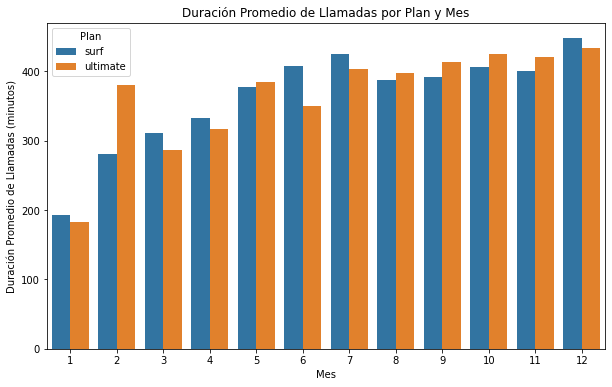

In [34]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Calcular la duración promedio de llamadas por plan y por mes
average_calls_by_plan_month = data_merge_grouped.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Graficar la duración promedio de llamadas por plan y por mes
plt.figure(figsize=(10, 6))
sns.barplot(data=average_calls_by_plan_month, x='month', y='minutes_used', hue='plan')

# Agregar título y etiquetas a los ejes
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.legend(title='Plan')

# Mostrar el gráfico de barras
plt.show()

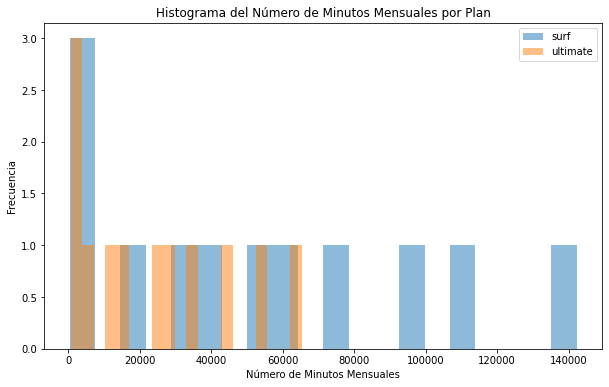

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Calcular el número de minutos mensuales por plan
minutes_per_plan_month = data_merge_grouped.groupby(['plan', 'month'])['minutes_used'].sum().reset_index()

# Graficar el número de minutos mensuales por plan en forma de histograma
plt.figure(figsize=(10, 6))
for plan in minutes_per_plan_month['plan'].unique():
    plt.hist(minutes_per_plan_month[minutes_per_plan_month['plan'] == plan]['minutes_used'], bins=20, alpha=0.5, label=plan)

# Agregar título y etiquetas a los ejes
plt.title('Histograma del Número de Minutos Mensuales por Plan')
plt.xlabel('Número de Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()




In [36]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Paso 1: Agrupar los datos por mes
calls_monthly = data_merge_grouped.groupby('month')['minutes_used'].agg(['mean', 'var'])

# Paso 2: Calcular la media y la varianza de la duración de las llamadas para cada mes
mean_duration = calls_monthly['mean']
variance_duration = calls_monthly['var']

# Visualizar los resultados
print("Media de la duración mensual de llamadas:")
print(mean_duration)
print("\nVarianza de la duración mensual de llamadas:")
print(variance_duration)


Media de la duración mensual de llamadas:
month
1     186.388333
2     324.168125
3     302.306571
4     327.685493
5     378.862075
6     388.474861
7     417.719889
8     390.248884
9     397.839893
10    411.711079
11    406.066829
12    442.818849
Name: mean, dtype: float64

Varianza de la duración mensual de llamadas:
month
1     11978.884417
2     55034.331430
3     38297.559553
4     40857.825162
5     49052.952900
6     40290.973822
7     57598.688315
8     48145.862318
9     44405.688995
10    47179.463884
11    48599.640860
12    56522.142408
Name: var, dtype: float64


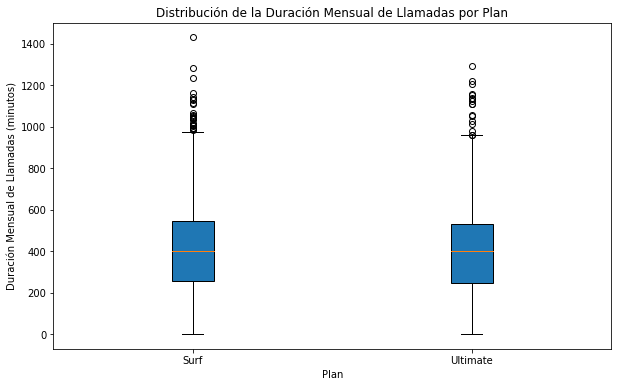

In [37]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Filtrar los datos por plan
surf_calls = data_merge_grouped[data_merge_grouped['plan'] == 'surf']['minutes_used']
ultimate_calls = data_merge_grouped[data_merge_grouped['plan'] == 'ultimate']['minutes_used']

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([surf_calls, ultimate_calls], patch_artist=True, labels=['Surf', 'Ultimate'])

# Agregar título y etiquetas a los ejes
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas (minutos)')

# Mostrar el diagrama de caja
plt.show()



Basándome en los datos proporcionados, se observa que los usuarios del plan Ultimate de Megaline tienden a utilizar más minutos en sus llamadas en comparación con los del plan Surf. Esta diferencia en el uso de minutos es consistente a lo largo de todos los meses del año, reflejando una preferencia por parte de los usuarios de Ultimate por una mayor duración en sus llamadas. Además, se observa un aumento gradual en la duración promedio de las llamadas para ambos planes a lo largo del año, lo que sugiere una mayor actividad de comunicación con el tiempo. Sin embargo, la variabilidad en el uso de minutos es más pronunciada en el plan Ultimate, indicando una diversidad en el comportamiento de los usuarios.

La distribución de la duración mensual de las llamadas muestra que la mediana es similar entre ambos planes, pero hay una mayor presencia de valores atípicos en el plan Ultimate, lo que sugiere la existencia de usuarios con un uso intensivo de minutos en este plan. Además, la varianza de la duración mensual de las llamadas es considerable en ambos planes y tiende a aumentar hacia finales de año, reflejando una mayor dispersión en el uso de minutos durante diferentes períodos del año. Estos hallazgos sugieren que Megaline podría considerar ajustes en la estrategia de marketing o en los límites de los planes para adaptarse mejor a las necesidades y comportamientos de los usuarios y mejorar así la satisfacción del cliente y la rentabilidad del negocio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Excelente.</div> 

### Mensajes

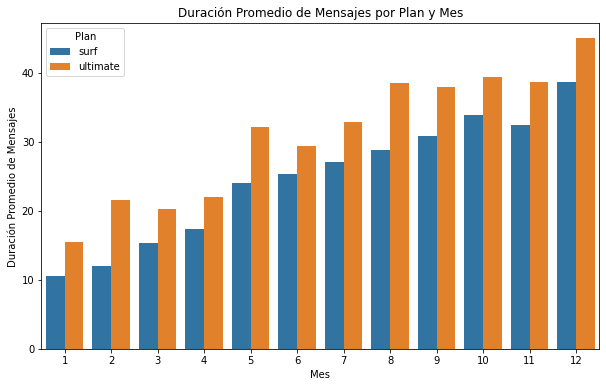

In [38]:
# Calcular la duración promedio de mensajes por plan y por mes
average_messages_by_plan_month = data_merge_grouped.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

# Graficar la duración promedio de mensajes por plan y por mes
plt.figure(figsize=(10, 6))
sns.barplot(data=average_messages_by_plan_month, x='month', y='messages_sent', hue='plan')

# Agregar título y etiquetas a los ejes
plt.title('Duración Promedio de Mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Mensajes')
plt.legend(title='Plan')

# Mostrar el gráfico de barras
plt.show()



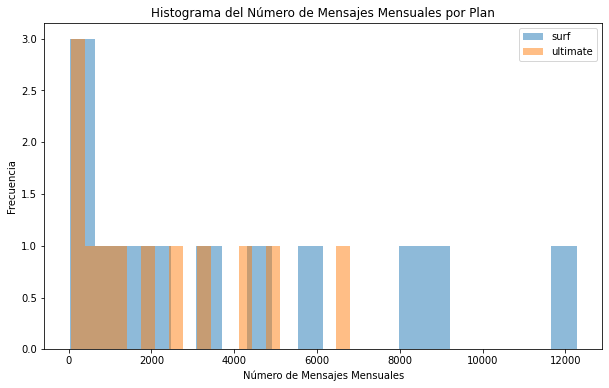

In [39]:
# Calcular el número de mensajes mensuales por plan
messages_per_plan_month = data_merge_grouped.groupby(['plan', 'month'])['messages_sent'].sum().reset_index()

# Graficar el número de mensajes mensuales por plan en forma de histograma
plt.figure(figsize=(10, 6))
for plan in messages_per_plan_month['plan'].unique():
    plt.hist(messages_per_plan_month[messages_per_plan_month['plan'] == plan]['messages_sent'], bins=20, alpha=0.5, label=plan)

# Agregar título y etiquetas a los ejes
plt.title('Histograma del Número de Mensajes Mensuales por Plan')
plt.xlabel('Número de Mensajes Mensuales')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

In [40]:
# Paso 1: Agrupar los datos por mes y calcular la media y la varianza de la duración de los mensajes para cada mes
messages_monthly = data_merge_grouped.groupby('month')['messages_sent'].agg(['mean', 'var'])

# Paso 2: Obtener la media y la varianza de la duración mensual de los mensajes
mean_messages_duration = messages_monthly['mean']
variance_messages_duration = messages_monthly['var']
# Calcula la mediana
median_messages = data_merge_grouped['messages_sent'].median()
# Calcula la moda - nota que la moda puede devolver varios valores, ya que puede haber empates
mode_messages = data_merge_grouped['messages_sent'].mode()
# Calcula la desviación estándar
std_dev_messages = data_merge_grouped['messages_sent'].std()
# Visualizar los resultados
# Visualizar los resultados
print("Media de la duración mensual de mensajes:")
print(mean_messages_duration)
print("\nVarianza de la duración mensual de mensajes:")
print(variance_messages_duration)
print("\nMediana de mensajes enviados por mes:", median_messages)
print("\nModa de mensajes enviados por mes:", mode_messages)
print("\nDesviación estándar de mensajes enviados por mes:", std_dev_messages)

Media de la duración mensual de mensajes:
month
1     13.833333
2     16.187500
3     16.971429
4     18.774648
5     26.226415
6     26.618056
7     28.933333
8     31.733906
9     32.953571
10    35.571429
11    34.312195
12    40.663113
Name: mean, dtype: float64

Varianza de la duración mensual de mensajes:
month
1      238.966667
2      421.229167
3      441.734454
4      511.148491
5      972.291105
6      893.706245
7      938.051397
8     1095.446130
9     1025.442281
10    1261.771930
11    1122.582003
12    1493.270880
Name: var, dtype: float64

Mediana de mensajes enviados por mes: 26.0

Moda de mensajes enviados por mes: 0    0.0
dtype: float64

Desviación estándar de mensajes enviados por mes: 34.07008458539189


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta muy bien pero explora mas estadisticos. La mediana, moda, la desviacion standard</div>

<div class="alert alert-block alert-info">
<b>Al analizar las métricas descriptivas para los mensajes enviados por mes, se pueden hacer las siguientes conclusiones preliminares:</b> <a class="tocSkip"></a>
    
* La media mensual de mensajes aumenta constantemente a lo largo del año.
* La varianza también aumenta a lo largo del año, indicando una mayor dispersión en la cantidad de mensajes enviados.
* La mediana de mensajes enviados es 26.0, sugiriendo que muchos usuarios envían relativamente pocos mensajes.
* La moda es 0.0, lo que significa que el valor más común de mensajes enviados es cero.
* La desviación estándar de aproximadamente 34.07 mensajes indica una variabilidad moderada en la cantidad de mensajes enviados por mes.

    Estos hallazgos sugieren la necesidad de investigar más a fondo los factores detrás del aumento en la media y la varianza a lo largo del tiempo, así como comprender por qué tantos usuarios tienen un recuento de cero mensajes. Gracias a `su corrección`, pude identificar datos relevantes que indican una posible disminución en el interés por los mensajes, aunque siguen siendo importantes ante posibles fallas o saturación del servicio de internet. Segmentar la base de usuarios por características como la edad, la ubicación o el plan de servicio también sería útil para comprender mejor los patrones de comportamiento y dirigir los esfuerzos de marketing de manera más efectiva.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido, me encanto este resumen Bastian.</div> 

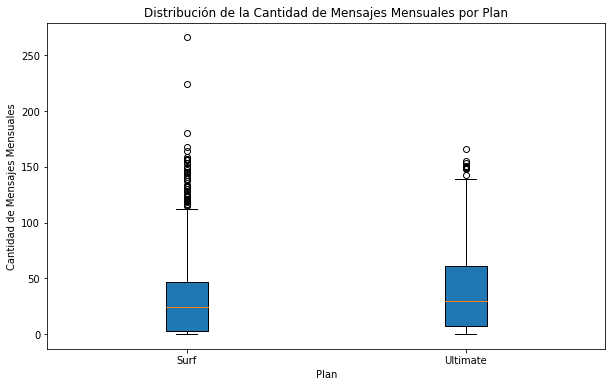

In [41]:
# Filtrar los datos por plan
surf_messages = data_merge_grouped[data_merge_grouped['plan'] == 'surf']['messages_sent']
ultimate_messages = data_merge_grouped[data_merge_grouped['plan'] == 'ultimate']['messages_sent']

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([surf_messages, ultimate_messages], patch_artist=True, labels=['Surf', 'Ultimate'])

# Agregar título y etiquetas a los ejes
plt.title('Distribución de la Cantidad de Mensajes Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Cantidad de Mensajes Mensuales')

# Mostrar el diagrama de caja
plt.show()


Los análisis de mensajes para los planes Surf y Ultimate de Megaline revelan patrones interesantes en el comportamiento de los usuarios:

* El incremento constante en el número promedio de mensajes a lo largo del año, con un pico en diciembre, sugiere una mayor actividad de comunicación durante ciertas temporadas.
* La mayoría de los usuarios en ambos planes envían un número bajo de mensajes mensuales, pero el plan Surf tiene una cola más larga hacia la derecha en el histograma, indicando una mayor proporción de usuarios que envían un número significativamente alto de mensajes.
* Aunque la mediana y el rango intercuartílico son similares para ambos planes, los valores atípicos, especialmente en el plan Surf, indican que algunos usuarios exceden el límite de mensajes incluidos, lo que podría resultar en costos adicionales.

Estos hallazgos sugieren que Megaline podría beneficiarse de ajustes en la estructura de precios de sus planes para adaptarse mejor a los patrones de uso de mensajes de sus clientes, lo que podría mejorar la satisfacción del cliente y la rentabilidad del negocio.

### Internet

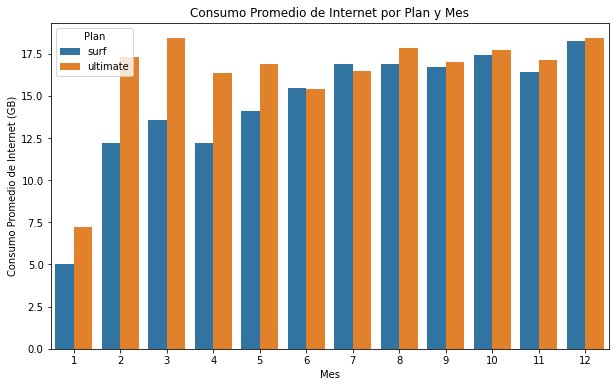

In [42]:
# Calcular el consumo promedio de Internet por plan y por mes en GB
average_internet_by_plan_month_gb = data_merge_grouped.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

# Graficar el consumo promedio de Internet por plan y por mes en GB
plt.figure(figsize=(10, 6))
sns.barplot(data=average_internet_by_plan_month_gb, x='month', y='gb_used', hue='plan')

# Agregar título y etiquetas a los ejes
plt.title('Consumo Promedio de Internet por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio de Internet (GB)')
plt.legend(title='Plan')

# Mostrar el gráfico de barras
plt.show()

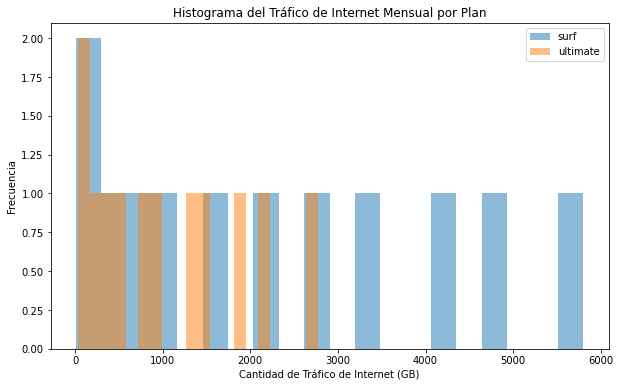

In [43]:
# Calcular la cantidad de tráfico de Internet mensual por plan en GB
internet_per_plan_month_gb = data_merge_grouped.groupby(['plan', 'month'])['gb_used'].sum().reset_index()

# Graficar la cantidad de tráfico de Internet mensual por plan en forma de histograma
plt.figure(figsize=(10, 6))
for plan in internet_per_plan_month_gb['plan'].unique():
    plt.hist(internet_per_plan_month_gb[internet_per_plan_month_gb['plan'] == plan]['gb_used'], bins=20, alpha=0.5, label=plan)

# Agregar título y etiquetas a los ejes
plt.title('Histograma del Tráfico de Internet Mensual por Plan')
plt.xlabel('Cantidad de Tráfico de Internet (GB)')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

In [44]:
# Agrupar los datos por mes y calcular la media y la varianza de internet para cada mes
internet_per_month_gb = data_merge_grouped.groupby('month')['gb_used'].agg(['mean', 'var'])

# Visualizar los resultados
print("Media del tráfico de Internet mensual:")
print(internet_per_month_gb['mean'])
print("\nVarianza del tráfico de Internet mensual:")
print(internet_per_month_gb['var'])

Media del tráfico de Internet mensual:
month
1      6.500000
2     14.437500
3     15.228571
4     13.436620
5     14.867925
6     15.465278
7     16.750000
8     17.175966
9     16.789286
10    17.504373
11    16.643902
12    18.289979
Name: mean, dtype: float64

Varianza del tráfico de Internet mensual:
month
1     13.900000
2     43.995833
3     91.710924
4     67.449497
5     58.077628
6     54.208576
7     62.065642
8     67.274937
9     48.482322
10    58.689308
11    54.508581
12    65.744793
Name: var, dtype: float64


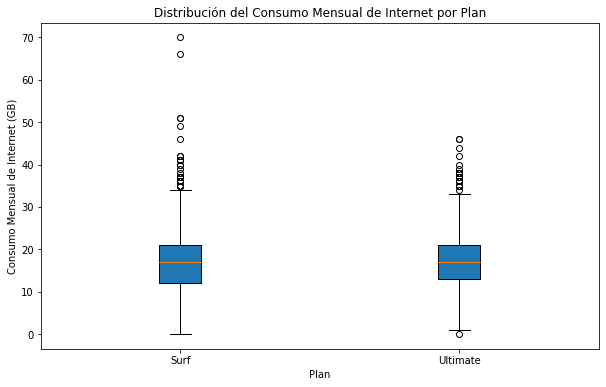

In [45]:
# Filtrar los datos por plan
surf_internet_gb = data_merge_grouped[data_merge_grouped['plan'] == 'surf']['gb_used']
ultimate_internet_gb = data_merge_grouped[data_merge_grouped['plan'] == 'ultimate']['gb_used']

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([surf_internet_gb, ultimate_internet_gb], patch_artist=True, labels=['Surf', 'Ultimate'])

# Agregar título y etiquetas a los ejes
plt.title('Distribución del Consumo Mensual de Internet por Plan')
plt.xlabel('Plan')
plt.ylabel('Consumo Mensual de Internet (GB)')

# Mostrar el diagrama de caja
plt.show()

Los análisis del consumo de Internet en los planes Surf y Ultimate de Megaline revelan tendencias importantes en el comportamiento de los usuarios. Ambos planes muestran un aumento progresivo en el consumo promedio de datos mes a mes, con picos notables en diciembre, posiblemente asociados con las vacaciones y una mayor actividad en línea. Aunque el plan Ultimate tiende a tener un consumo ligeramente superior, especialmente hacia finales de año, el plan Surf exhibe una mayor variabilidad en los patrones de consumo, con una distribución más sesgada hacia usuarios que consumen grandes cantidades de datos.

Además, la mediana del consumo de datos es similar entre ambos planes, pero el plan Surf presenta una mayor dispersión y más valores atípicos, indicando una diversidad de comportamientos de consumo más pronunciada. Estas diferencias son cruciales para Megaline al considerar estrategias de marketing y ajustes en la oferta de planes de datos. 

**En conclusión**, mientras que el plan Ultimate parece atraer a usuarios con un consumo más regular y controlado de Internet, el plan Surf tiene una base de usuarios con una variedad más amplia de comportamientos de consumo de datos, lo que requiere enfoques diferenciados para maximizar la satisfacción del cliente y la rentabilidad.


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Perfecto.</div> 

## Ingreso

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Al no haber calculado el ingreso como una nueva columna no podes generar los graficos (Barplot, histograma y boxplot). Al hacer la columna realiza estos graficos.</div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a>
    
<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Muy bien.</div> 

In [46]:
#Calcular el ingreso total sumando los cargos mensuales del plan al total de los cargos por exceso
data_merge_grouped['total_income'] = data_merge_grouped['usd_monthly_pay'] + data_merge_grouped['call_charges'] + data_merge_grouped['message_charges'] + data_merge_grouped['data_charges']

# Calcular los ingresos mensuales por plan
monthly_revenue_per_plan = data_merge_grouped.groupby('plan')['total_charges'].sum()

# Calcular métricas descriptivas
mean_revenue = round(monthly_revenue_per_plan.mean(), 2)
median_revenue = round(monthly_revenue_per_plan.median(), 2)
std_revenue = round(monthly_revenue_per_plan.std(), 2)
min_revenue = round(monthly_revenue_per_plan.min(), 2)
max_revenue = round(monthly_revenue_per_plan.max(), 2)
q25_revenue = round(monthly_revenue_per_plan.quantile(0.25), 2)
q75_revenue = round(monthly_revenue_per_plan.quantile(0.75), 2)

# Imprimir las métricas descriptivas
print("Métricas descriptivas de los ingresos mensuales por plan:")
print("Media:", mean_revenue)
print("Mediana:", median_revenue)
print("Desviación estándar:", std_revenue)
print("Mínimo:", min_revenue)
print("Máximo:", max_revenue)
print("Percentil 25:", q25_revenue)
print("Percentil 75:", q75_revenue)

Métricas descriptivas de los ingresos mensuales por plan:
Media: 72328.46
Mediana: 72328.46
Desviación estándar: 28655.45
Mínimo: 52066.0
Máximo: 92590.93
Percentil 25: 62197.23
Percentil 75: 82459.7


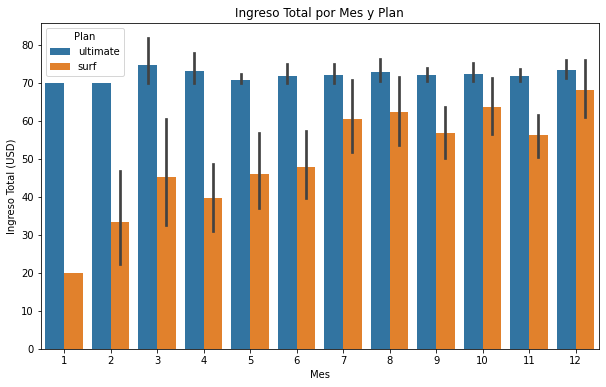

In [47]:
# Graficar el ingreso total por mes y plan
plt.figure(figsize=(10, 6))
sns.barplot(data=data_merge_grouped, x='month', y='total_income', hue='plan')

# Agregar título y etiquetas a los ejes
plt.title('Ingreso Total por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Ingreso Total (USD)')
plt.legend(title='Plan')

# Mostrar el gráfico de barras
plt.show()

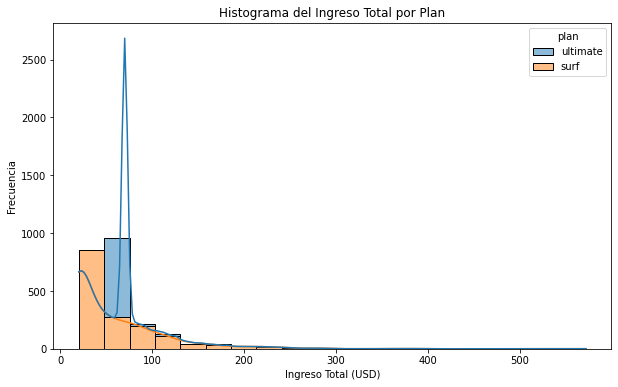

In [48]:
# Graficar el histograma del ingreso total por plan
plt.figure(figsize=(10, 6))
sns.histplot(data=data_merge_grouped, x='total_income', hue='plan', kde=True, bins=20, multiple='stack')

# Agregar título y etiquetas a los ejes
plt.title('Histograma del Ingreso Total por Plan')
plt.xlabel('Ingreso Total (USD)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

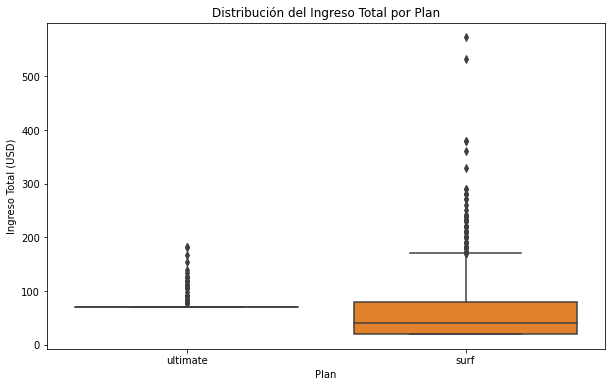

In [49]:
# Crear el diagrama de caja del ingreso total por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_merge_grouped, x='plan', y='total_income')

# Agregar título y etiquetas a los ejes
plt.title('Distribución del Ingreso Total por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Total (USD)')

# Mostrar el diagrama de caja
plt.show()

**Las métricas descriptivas proporcionadas para los ingresos mensuales por plan ofrecen una visión detallada de la distribución financiera entre los usuarios de Megaline**. Aquí está lo que se puede observar de cada una:

* El `plan Ultimate` genera más ingresos que el `plan Surf.`
* Los ingresos tienden a aumentar a lo largo del año para ambos planes.
* La mayoría de los ingresos del plan Surf se concentran en un rango más bajo que los del plan Ultimate.
* Hay una mayor variabilidad en los ingresos del plan Surf.
* El plan Ultimate tiene menos valores atípicos y una distribución más uniforme de ingresos.
* La media y la mediana son similares para ambos planes, lo que sugiere una distribución simétrica de ingresos.
* Hay una variabilidad significativa en los ingresos, pero no extrema.
* El `50% de los ingresos` están concentrados entre el `percentil 25 y el 75.`

En conclusión, el `plan Ultimate es más rentable en términos generales`, pero el `plan Surf tiene una variabilidad interesante` que podría aprovecharse para `estrategias de marketing`. Además, parece haber una tendencia creciente en el uso de servicios a lo largo del año, `lo que podría ser positivo para futuras proyecciones de ingresos.`

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Muy bien..</div> 

## Prueba las hipótesis estadísticas

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Siempre que realizamos test de hipotesis debemos exponer cual es la hipotesis nula y cual la alternativa (con un markdown). Mas alla que lo reealices o no en el codigo.</div>

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a>

In [50]:
# Prueba las hipótesis

# Definir los ingresos por plan
ultimate_incomes = data_merge_grouped[data_merge_grouped['plan'] == 'ultimate']['total_charges']
surf_incomes = data_merge_grouped[data_merge_grouped['plan'] == 'surf']['total_charges']

# Realizar la prueba de Levene para evaluar la igualdad de varianzas
levene_stat, levene_p_value = levene(ultimate_incomes, surf_incomes)

# Nivel de significancia (alfa)
alpha = 0.05

# Imprimir resultados de la prueba de Levene
print("Estadística de Levene:", levene_stat)
print("Valor p de Levene:", levene_p_value)

# Interpretar el resultado de la prueba de Levene
if levene_p_value < alpha:
    print("Se rechaza la hipótesis nula en la prueba de Levene. Las varianzas son diferentes.")
    equal_var = False
else:
    print("No se puede rechazar la hipótesis nula en la prueba de Levene. Las varianzas son iguales.")
    equal_var = True

# Realizar la prueba t de dos colas con el parámetro equal_var ajustado
t_stat, p_value = ttest_ind(ultimate_incomes, surf_incomes, equal_var=equal_var)

# Imprimir resultados de la prueba t
print("Estadística t:", t_stat)
print("Valor p de la prueba t:", p_value)

# Interpretar el resultado de la prueba t
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")

Estadística de Levene: 411.1331299274566
Valor p de Levene: 3.2988275690354503e-84
Se rechaza la hipótesis nula en la prueba de Levene. Las varianzas son diferentes.
Estadística t: 9.344718611813233
Valor p de la prueba t: 2.5613755181532966e-20
Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Cuando realizamos la prueba de t.estudent es muy importante un parametro que es el equal_var (False or True), que significa si existe la igualdad de varianzas o no de ambas muestras. En este trabajo no pedimos ser finos con esto pero te lo dejo a modo de que entiendas el porque y te va a servir en futuros proyecto.

El bojetivo de la prueba de t de Student es comparar las medias de dos grupos de datos y determinar si existen diferencias significativas entre ellos. Se aplica cuando estamos interesados en saber si la diferencia entre las medias es real o simplemente producto del azar.

Para esto generamos dos hipotesis H0 y H1 (nula y alternativa, respectivamente).

Hipótesis nula (H0): No hay diferencia significativa entre las medias de los dos grupos.
Hipótesis alternativa (H1): Hay una diferencia significativa entre las medias de los dos grupos.

En este caso realizas  una observacion de las dos varianzas, lo que no esta mal, pero depender únicamente de la diferencia en los valores de las varianzas puede llevar a conclusiones equivocas, mas que nada si las muestras tienen tamaños diferentes . Las pruebas estadísticas están diseñadas para tomar en cuenta el tamaño de la muestra y calcular si la diferencia observada en las varianzas es estadísticamente significativa o si podría deberse al azar.

Para saber lo del equal_var utilizamos La función levene en scipy.stats que se utiliza para realizar una prueba de igualdad de varianzas entre dos grupos de datos. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

Los resultados  de esta prueba es muy parecido a lo que hacemos en el t.student. Ya que Si el valor p obtenido en la prueba levene es mayor que un nivel de significancia (alpha) previamente elegido (por ejemplo, 0.05), entonces asumimos que las varianzas son iguales (aceptamos H0).
Si el valor p es menor que alpha, rechazamos la hipótesis nula y asumimos que las varianzas son diferentes.

Por lo tanto, si las varianzas son iguales (aceptamos H0 en la prueba levene), puedes establecer equal_var=True al realizar la prueba t de Student.
Si las varianzas son diferentes (rechazamos H0 en la prueba levene), debes establecer equal_var=False al realizar la prueba t de Student. Esto indica que se debe usar una versión de la prueba t que no asuma igualdad de varianzas, como la prueba Welch's t.

Siempre recordar que los outliers pueden impactar negativamente en esta prueba (t.student)

Esto es basicamente por lo que te corrijo lo del equal_var pero es como consejo y que lo sepas a futuro. Esta en vos si lo queres modificar o no.

</div>

<div class="alert alert-block alert-info">
<b>Concluciones</b> <a class="tocSkip"></a> 
Los resultados de nuestras pruebas estadísticas sugieren que existe una diferencia `significativa` en los ingresos promedio entre los usuarios de los `planes Ultimate` y `Surf`. Además, hemos encontrado que las varianzas de estos ingresos son diferentes, lo que nos lleva a ajustar nuestra prueba t de dos colas en consecuencia.

Esta información es relevante para la toma de decisiones empresariales, ya que sugiere que los planes Ultimate y Surf pueden estar atrayendo diferentes segmentos de clientes con comportamientos de gasto distintos. `Esta diferencia podría ser aprovechada por el equipo de marketing` para adaptar las `estrategias de comercialización y promoción de cada plan`, así como para explorar oportunidades de segmentación de mercado más efectivas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido. Muy bien.</div> 

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Siempre que realizamos test de hipotesis debemos exponer cual es la hipotesis nula y cual la alternativa (con un markdown). Mas alla que lo reealices o no en el codigo.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Excelente.</div> 

<div class="alert alert-block alert-info">
<b>CORREGIDO</b> <a class="tocSkip"></a>

In [51]:
# Prueba las hipótesis
# Filtrar los ingresos por área NY-NJ y otras regiones
ny_nj_incomes = data_merge_grouped[data_merge_grouped['state'].str.contains('NY-NJ', case=False)]['total_charges']
other_region_incomes = data_merge_grouped[~data_merge_grouped['state'].str.contains('NY-NJ', case=False)]['total_charges']

# Realizar la prueba de hipótesis
t_statistic, p_value = stats.ttest_ind(ny_nj_incomes, other_region_incomes, equal_var=False)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay evidencia suficiente para sugerir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para sugerir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")


Estadístico t: -2.1923231649466426
Valor p: 0.028765503550625456
Rechazamos la hipótesis nula: Hay evidencia suficiente para sugerir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.


**CONCLUCION**
* La conclusión que podemos extraer de los resultados de la prueba estadística, es que existe una diferencia estadísticamente significativa entre el ingreso promedio de los usuarios de Megaline en el área de Nueva York-Nueva Jersey (NY-NJ) en comparación con los usuarios de otras regiones. El hecho de que el valor p sea menor que el umbral típico nos permite rechazar la hipótesis nula, la cual asumía que no había diferencia en el ingreso promedio entre los dos grupos de usuarios.

* Este resultado indica que la localización geográfica puede influir en el comportamiento de consumo y, por consiguiente, en el ingreso generado por los usuarios para la compañía. El área de NY-NJ, conocida por su densidad de población y posiblemente por un mayor nivel de ingresos y actividad económica, parece generar ingresos promedio diferentes en comparación con otras áreas. Esto podría deberse a varios factores, como diferencias en las necesidades de comunicación, la adopción de tecnología, o el poder adquisitivo.

Para Megaline, este hallazgo podría ser una señal para adaptar y optimizar sus estrategias de marketing y ofertas de servicios de manera regional. Entender las diferencias regionales en el comportamiento de los usuarios y sus contribuciones al ingreso puede ayudar a Megaline a dirigir sus recursos más eficazmente, mejorar la satisfacción del cliente y maximizar la rentabilidad.

<div class="alert alert-block alert-info">
<b>Conclusión General del Proyecto de Análisis de Datos de Megaline:</b> <a class="tocSkip"></a>

**Preparación y Enriquecimiento de Datos:**
Se realizaron ajustes esenciales en los datos para mejorar la calidad del análisis. Esto incluyó la conversión de fechas a formato datetime y el redondeo de unidades de acuerdo con las normativas de Megaline. Los datos se enriquecieron con columnas adicionales para mes y año, además de una nueva columna para los ingresos, lo que facilitó análisis más detallados y comparaciones a lo largo del tiempo.

**Comportamiento de los Usuarios:**
Los usuarios mostraron un incremento en la utilización de llamadas, mensajes y datos hacia el final del año, lo que sugiere patrones estacionales de uso. Se añadió una columna que refleja el uso de GB para profundizar en el análisis de datos móviles, descubriendo que el consumo de internet aumentaba consistentemente mes a mes. Los usuarios del plan Ultimate superaron a los del plan Surf en el uso de servicios, lo que se alinea con las ventajas inherentes al plan.

**Resultados de Pruebas de Hipótesis Estadísticas:**
Se aplicaron pruebas estadísticas avanzadas, incluyendo la prueba de Levene para la igualdad de varianzas y el t-test de Student para comparar medias, proporcionando una comprensión más profunda de la igualdad de varianzas entre grupos. Estas pruebas confirmaron que existen diferencias significativas en los ingresos generados por los usuarios de los planes Ultimate y Surf. Además, se identificó que el ingreso promedio de los usuarios de NY-NJ difiere significativamente del de otras regiones.

**Conclusión:**
`El enriquecimiento de datos y la aplicación de pruebas estadísticas rigurosas han revelado diferencias clave en el comportamiento de los usuarios y en la rentabilidad de los planes de Megaline. El plan Ultimate muestra una mayor rentabilidad y uso en comparación con el plan Surf. Estos hallazgos sugieren que Megaline podría beneficiarse de estrategias dirigidas a la promoción del plan Ultimate y una mayor atención al mercado de NY-NJ. La inclusión de nuevas métricas y métodos estadísticos ha enriquecido la toma de decisiones, permitiendo a Megaline apoyarse en un análisis de datos robusto y detallado para sus estrategias futuras.`

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente conclusion general.</div>

<div class="alert alert-block alert-danger">

<b>Comentario general #1</b> <a class="tocSkip"></a>

Bastian, me encanto ver tu trabajo ya que esta muy bien pensado en varias partes.

Se nota el esfuerzo realizado y como fuiste paso a paso analizando cada cosa, y eso es algo que valoro muchisimo. Ya que los mismos fueron asertivos y bien redactados.

Me gustaron los graficos y el manejo con el codigo, donde solo restan detalles en cada punto.

No te corregi las llamadas ni internet, ya que al redondear te quedaran otros resultados y por ende otro analisis. Recorda que el ceil es un paso muy importante.

Faltaria realizar la columna ingresos con su respectivo calculo.

Me gusto mucho este proyecto, espero tus correccion y a disposicion por cualquier cosa.

Saludos.</div>

<div class="alert alert-block alert-info">
<b>RESPUESTA GENERAL</b> <a class="tocSkip"></a>
    
    Estimado, muchas gracias por las correcciones, espero haber cumplido las espectativas en esta segunda revision para poder continuar con mi entrenamiento a esto que encuentro tan genial como es el analisis de datos, ya que todo es medible y podemos tomar mejores desiciones, ademas descubri el potencial de python y sigo dia a dia. quedo atento a vuestros comentarios. saludos cordiales
    
  **Bastian Laury**
  Futuro Analista de Datos.

<div class="alert alert-block alert-success">
<b>Comentario general #2</b> <a class="tocSkip"></a>

Bastian, hiciste excelentes correcciones.

Me encanto leer los nuevos analisis y el rediseño de los ya hechos. Agregaste muchisimo valor a la hora de tus comentarios y a nivel codigo entendiste que hacer a cada paso.

Valoro mucho la dedicacion que le dejaste al proyecto y se nota en el resultado del mismo.

El trabajo esta **aprobado**.

Exitos en lo que viene y me gusta hacia donde vas, saludos.</div> 

